This is our QSS 20 Project
Nathaniel

In [253]:
!pip install gdown

In [254]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [255]:
# General utilities
import os
import re
import warnings

# Data manipulation and analysis
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Machine learning tools
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn import tree

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import graphviz
from sklearn.tree import export_graphviz

# NLP tools
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

# Downloads
import gdown

# Setting options
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set()
%matplotlib inline


In [6]:
url = 'https://drive.google.com/uc?id=1_OhbcZWcpii7Hu9o-Z31p05ODeBgiyVm'
output = 'covid_sample0.001.pkl'
gdown.download(url, output, quiet=False)

covid_sample0_001 = pd.read_pickle(output)

Downloading...
From (original): https://drive.google.com/uc?id=1_OhbcZWcpii7Hu9o-Z31p05ODeBgiyVm
From (redirected): https://drive.google.com/uc?id=1_OhbcZWcpii7Hu9o-Z31p05ODeBgiyVm&confirm=t&uuid=747b3f13-5dbb-4620-a631-d404cd576e54
To: /Users/nathanielmiller/Documents/Qss20-Final-Project/code/covid_sample0.001.pkl
100%|██████████████████████████████████████| 2.89G/2.89G [02:14<00:00, 21.5MB/s]


In [256]:
# Define the DataFrame you want to print
df_to_print = covid_sample0_001  # Replace with your DataFrame

# Use a context manager to set display options temporarily
with pd.option_context('display.max_columns', None, 'display.width', None):
    print(df_to_print)

                    tweetid               userid    screen_name  \
15605   1220641644367765504   747463650881970176   gareth_grier   
16910   1220640235358281729   937270922234363905      Rose_ifnt   
8796    1220632931489574913           3869545214     SinoVoices   
14795   1220642433127436288           1053953342  _KhairiHassan   
4225    1220640550178762753  1104714610421190656    Gaz60656269   
...                     ...                  ...            ...   
90900   1482664673854038016            508859323      laudemare   
22201   1482656524245909507  1390529577760530433     Justbob111   
81791   1482663571716775936  1464936163123281923     falcon2800   
88826   1482664418727145473            798161712    KevinSalvat   
102639  1482666092438953995  1327585064541106177   claveledith1   

                                  date lang       location place_id place_url  \
15605   Fri Jan 24 09:37:01 +0000 2020   en            NaN      NaN       NaN   
16910   Fri Jan 24 09:31:25 +0000

In [90]:
#Filter for only tweets that pertain to mental health

filtered_tweets = df_to_print[df_to_print['text'].str.contains('mental health' or 'depression' or 'stress' or 'therapy' or 
                                                               'counseling' or 'mental illness' or 'wellbeing' or 'psychological' or 
                                                               'psychiatrist' or 'mental disorder' or 'mental wellbeing' or 
                                                               'mental health support' or 'anxiety' or 'depress' or 'sad' or 'angry' 
                                                               or 'cry' or 'suicide' or 'kms' or 'kill myself' or 'fml' or 
                                                               'fuck my life' or 'anxious' or 'bipolar disorder' or 'schizophrenia' 
                                                               or 'PTSD' or 'OCD' or 'ADHD' or 'eating disorders' or 'panic attacks' 
                                                               or 'hopeless' or 'helpless' or 'worthless' or 'overwhelmed' or 
                                                               'nervous' or 'insomnia' or 'mood swings' or 'fearful' or 'isolation'
                                                               or 'loneliness' or 'support group' or 'hotline' or 
                                                               'crisis intervention' or 'self-help' or 'peer support' or 'recovery' 
                                                               or 'healing' or 'medication' or 'antidepressants' or 
                                                               'therapy session' or 'CBT' or 'DBT' or 'psychotherapy' or 
                                                               'group therapy' or 'cognitive therapy' or 'mental breakdown' 
                                                               or 'burnout' or 'nervous breakdown' or 'losing my mind' or 'feeling blue' 
                                                               or 'down in the dumps' or 'panic attack' or 'mindfulness' or 'meditation' 
                                                               or 'wellness' or 'self-care' or 'resilience' or 'emotional health'
, na=False, case=False)]

filtered_tweets

,tweetid,userid,screen_name,date,lang,location,place_id,place_url,place_type,place_name,...,rt_country,qtd_state,qtd_country,norm_country,norm_rt_country,norm_qtd_country,description,rt_user_description,qtd_user_description,acc_age
8458,1222857511004516352,865332284064358400,WellBeingTrust,Thu Jan 30 12:22:04 +0000 2020,en,"Oakland, CA",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN
160,1244613935673851905,1163622451349282820,se_haddon,Mon Mar 30 13:14:20 +0000 2020,en,"Sherbrooke, Québec",NaN,NaN,NaN,NaN,...,Canada,NaN,NaN,Canada,Canada,NaN,NaN,NaN,NaN,NaN
19902,1260008520344145920,369298232,Ali5ontweets,Tue May 12 00:46:55 +0000 2020,en,Los Angeles,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN
17176,1248709057520730114,1248707122600296448,JohnMal87796872,Fri Apr 10 20:26:53 +0000 2020,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8249,1246397333149036544,443413372,kitkatkatex33,Sat Apr 04 11:20:55 +0000 2020,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73157,1482796197857406981,1001276241583001606,DrPamFox1,Sun Jan 16 19:25:37 +0000 2022,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1328.0
139627,1481668997955219458,1019329131228491776,NavidRPh,Thu Jan 13 16:46:31 +0000 2022,en,KemK’emeláy (Vancouver),NaN,NaN,NaN,NaN,...,NaN,NaN,Canada,NaN,NaN,Canada,Articling student. Clinical Pharmacist. 2x @UB...,NaN,Ontario provincial affairs reporter @CBCNews T...,1275.0
46922,1484651246128562176,1246550636134449157,16_hwy,Fri Jan 21 22:16:55 +0000 2022,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tweeting breaking news from http://www.CTVNews...,657.0
160972,1482773492798046210,947593868,NedFlanders1946,Sun Jan 16 17:55:23 +0000 2022,en,NaN,NaN,NaN,NaN,NaN,...,United Kingdom,NaN,NaN,NaN,United Kingdom,NaN,NaN,Together Association stands for Freedom\nWe wa...,NaN,3350.0


In [91]:
#Filter by date


#ensure that dates are in the correct format
filtered_tweets['date'] = pd.to_datetime(filtered_tweets['date'], format='%a %b %d %H:%M:%S %z %Y')


# Create a timezone-aware cutoff date
cutoff_date = pd.Timestamp('2020-03-01', tz='UTC')

# Filter the DataFrame for dates after the cutoff date
filtered_tweets = filtered_tweets[filtered_tweets['date'] > cutoff_date]


filtered_tweets

/var/folders/td/x0grzz1s0q1f9qy515nzthbm0000gn/T/ipykernel_61681/1178505355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tweets['date'] = pd.to_datetime(filtered_tweets['date'], format='%a %b %d %H:%M:%S %z %Y')


,tweetid,userid,screen_name,date,lang,location,place_id,place_url,place_type,place_name,...,rt_country,qtd_state,qtd_country,norm_country,norm_rt_country,norm_qtd_country,description,rt_user_description,qtd_user_description,acc_age
160,1244613935673851905,1163622451349282820,se_haddon,2020-03-30 13:14:20+00:00,en,"Sherbrooke, Québec",NaN,NaN,NaN,NaN,...,Canada,NaN,NaN,Canada,Canada,NaN,NaN,NaN,NaN,NaN
19902,1260008520344145920,369298232,Ali5ontweets,2020-05-12 00:46:55+00:00,en,Los Angeles,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN
17176,1248709057520730114,1248707122600296448,JohnMal87796872,2020-04-10 20:26:53+00:00,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8249,1246397333149036544,443413372,kitkatkatex33,2020-04-04 11:20:55+00:00,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21872,1243869874302009345,857936728165896204,Joni_Looking,2020-03-28 11:57:42+00:00,en,"Home in MI & Kissimmee, FL",NaN,NaN,NaN,NaN,...,United States,NaN,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73157,1482796197857406981,1001276241583001606,DrPamFox1,2022-01-16 19:25:37+00:00,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1328.0
139627,1481668997955219458,1019329131228491776,NavidRPh,2022-01-13 16:46:31+00:00,en,KemK’emeláy (Vancouver),NaN,NaN,NaN,NaN,...,NaN,NaN,Canada,NaN,NaN,Canada,Articling student. Clinical Pharmacist. 2x @UB...,NaN,Ontario provincial affairs reporter @CBCNews T...,1275.0
46922,1484651246128562176,1246550636134449157,16_hwy,2022-01-21 22:16:55+00:00,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tweeting breaking news from http://www.CTVNews...,657.0
160972,1482773492798046210,947593868,NedFlanders1946,2022-01-16 17:55:23+00:00,en,NaN,NaN,NaN,NaN,NaN,...,United Kingdom,NaN,NaN,NaN,United Kingdom,NaN,NaN,Together Association stands for Freedom\nWe wa...,NaN,3350.0


In [257]:
# # Assuming 'X_features_scaled_df' and 'subset_data' are defined and properly formatted
# XX = sm.add_constant(X_features_scaled_df)  # Add constant to include an intercept in the model
# y = subset_data['rt_qtd_count_log10']  # Response variable

# # Create and fit the OLS model
# model = sm.OLS(y, XX)
# results = model.fit()

# # Extract the coefficients table from the model summary
# table_data = results.summary().tables[1]

# # Convert the SimpleTable to a DataFrame
# AA_df = pd.DataFrame(data=table_data.data[1:], columns=table_data.data[0])

# # Prepare the dictionary for column names
# column_names_list = ['const'] + X_features_scaled_df.columns.tolist()
# column_order_dict = {index: name for index, name in enumerate(column_names_list)}

# # Replace the first column in AA_df
# if len(AA_df) == len(column_order_dict):
#     AA_df.iloc[:, 0] = [column_order_dict[i] for i in range(len(AA_df))]
# else:
#     print("Mismatch in the number of rows in AA_df and the number of items in column_order_dict.")

# # Display the modified DataFrame
# AA_df

In [203]:
# Assuming 'X' is your feature DataFrame and 'text' is the column name
# if 'text' in X.columns:
#     print("Text column is still in the DataFrame. Removing it...")
#     X = X.drop('text', axis=1)  # Remove the text column
# else:
#     print("Text column has already been removed.")

Text column is still in the DataFrame. Removing it...


<timed exec>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


R^2: 0.7805251652419201
Mean Squared Error: 0.25795573610053774
Mean Absolute Error: 0.4034989132872366


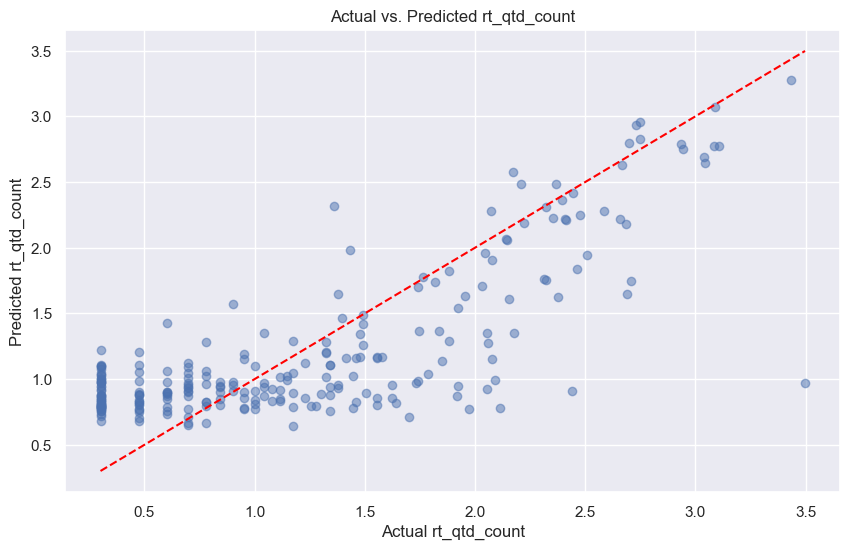

CPU times: user 2.68 s, sys: 1.01 s, total: 3.68 s
Wall time: 3.91 s


In [315]:
%%time
# Correct Model for Predicting States with Modifications to RandomForest

# Load the dataset
data = filtered_tweets

# Remove rows with missing values in the 'text' column
data = data.dropna(subset=['text'])

# Function to perform sentiment analysis
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return 'positive' if sentiment >= 0 else 'negative'

# Apply sentiment analysis to each sentence and create a new column
data['sentiment'] = data['text'].apply(get_sentiment)

# Extract the relevant features and sentiment column
columns_to_extract = ['state', 'text', 'rt_qtd_count', 'sentiment', 'friends_count', 'followers_count']
subset_data = data[columns_to_extract]

# Handle missing values in 'state', 'friends_count', and 'followers_count' columns
subset_data['state'].fillna('Unknown', inplace=True)
subset_data['rt_qtd_count'].fillna(0, inplace=True)
subset_data['friends_count'].fillna(0, inplace=True)
subset_data['followers_count'].fillna(0, inplace=True)

# Remove rows where 'rt_qtd_count' is zero
subset_data = subset_data[subset_data['rt_qtd_count'] > 0]

# Apply log base 10 transformation with a small constant to avoid zero values
subset_data['rt_qtd_count_log10'] = np.log10(subset_data['rt_qtd_count'] + 1)

# Prepare the data
X = subset_data[['state', 'text', 'sentiment', 'followers_count', 'friends_count']]

# Create dummy variables for the 'state' column
X = pd.get_dummies(X, columns=['state'], drop_first=True)

# Convert sentiment to numerical representation
sentiment_map = {'positive': 1, 'negative': 0}
X['sentiment'] = X['sentiment'].map(sentiment_map)

# Create a Count vectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'text' column
X_text = vectorizer.fit_transform(X['text'])

# Get the feature names (column names after vectorization)
feature_names = vectorizer.get_feature_names_out()

# Create DataFrame from the transformed text data
X_text_df = pd.DataFrame(X_text.toarray(), columns=feature_names, index=X.index)

# Drop the original 'text' column from X before combining (CHANGE HERE)
X = X.drop('text', axis=1)  # Remove the original text column

# Combine the transformed 'text' and other features
X_other_features = X.reset_index(drop=True)
X_features = pd.concat([X_text_df.reset_index(drop=True), X_other_features], axis=1)

# Convert all column names to strings
X_features.columns = X_features.columns.astype(str)

# Ensure there are no NaN values in the feature sets
X_features.fillna(0, inplace=True)

# Scale numerical features
scaler = StandardScaler()
X_features_scaled_states = scaler.fit_transform(X_features)

# Convert the scaled array back to a DataFrame with the original column names
X_features_scaled_states_df = pd.DataFrame(X_features_scaled_states, columns=X_features.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled_states_df, subset_data['rt_qtd_count_log10'], test_size=0.2, random_state=42)

# Create and train the Random Forest regressor model
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    bootstrap=True
)

model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = np.corrcoef(y_test, y_pred)[0, 1]
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R^2:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted rt_qtd_count')
plt.xlabel('Actual rt_qtd_count')
plt.ylabel('Predicted rt_qtd_count')
plt.show()



In [316]:
# Ensure that the DataFrame and response are aligned
X_features_scaled_countries_df.reset_index(drop=True, inplace=True)
subset_data.reset_index(drop=True, inplace=True)

# Check and ensure all columns are of numeric type
X_features_scaled_countries_df = X_features_scaled_countries_df.apply(pd.to_numeric, errors='ignore')

# Add a constant to the feature DataFrame
XX = sm.add_constant(X_features_scaled_countries_df)

# Confirm alignment
assert len(XX) == len(subset_data['rt_qtd_count_log10']), "The lengths of XX and y must match"

# Response variable
y = subset_data['rt_qtd_count_log10']

def verify_data_alignment(features, response):
    if not features.index.equals(response.index):
        raise ValueError("Indices do not match.")
    if features.isnull().any().any() or response.isnull().any():
        raise ValueError("NaN values found in data.")
    if features.shape[0] != response.shape[0]:
        raise ValueError("Feature and response variable lengths do not match.")
    print("Data verification passed. Proceeding with model fitting.")

verify_data_alignment(XX, subset_data['rt_qtd_count_log10'])


Data verification passed. Proceeding with model fitting.


In [317]:
XX = X_features_scaled_states

XX = sm.add_constant(XX)
y = subset_data['rt_qtd_count_log10']
model = sm.OLS(y, XX)


In [318]:
results = model.fit()
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     rt_qtd_count_log10   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.034
Date:                Sat, 01 Jun 2024   Prob (F-statistic):              0.362
Time:                        21:43:14   Log-Likelihood:                -614.06
No. Observations:                1233   AIC:                             3036.
Df Residuals:                     329   BIC:                             7662.
Df Model:                         903                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2444      0.032     38.441      0.000       1.181       1.308
x1              1e+11   1.66e+11      0.602      0.547   -2.27e+11    4.27e+11
x2            1.3e+11   6.72e+11      0.194      0.847   -1.19e+12    1.45e+12
x3          4.589e+09   9.85e+11      0.005      0.996   -1.93e+12    1.94e+12
x4         -1.581e+11   4.57e+11     -0.346      0.730   -1.06e+12    7.42e+11
x5         -2.089e+11   2.99e+11     -0.698      0.486   -7.98e+11     3.8e+11
x6         -1.069e+11   3.29e+11     -0.325      0.745   -7.54e+11     5.4e+11
x7         -2.236e+11   4.36e+11     -0.513      0.608   -1.08e+12    6.33e+11
x8          8.858e+10   3.44e+11      0.257      0.797   -5.89e+11    7.66e+11
x9         -4.138e+11   8.44e+11     -0.491      0.624   -2.07e+12    1.25e+12
x10        -8.859e+10   1.72e+11     -0.516      0.606   -4.27e+11    2.49e+11
x11        -6.344e+10   1.45e+11     -0.437      0.662   -3.49e+11    2.22e+11
x12         5.686e+10   2.35e+11      0.242      0.809   -4.06e+11     5.2e+11
x13         1.733e+11    2.2e+11      0.787      0.432    -2.6e+11    6.07e+11
x14        -2.998e+10   3.82e+11     -0.078      0.938   -7.82e+11    7.22e+11
x15        -1.015e+11   1.89e+11     -0.537      0.592   -4.73e+11     2.7e+11
x16        -7.197e+10   1.58e+11     -0.457      0.648   -3.82e+11    2.38e+11
x17        -1.591e+12   2.56e+12     -0.623      0.534   -6.62e+12    3.44e+12
x18         6.021e+10   1.38e+11      0.436      0.663   -2.11e+11    3.32e+11
x19        -7.291e+10   4.08e+11     -0.179      0.858   -8.75e+11    7.29e+11
x20        -1.439e+11    4.5e+11     -0.320      0.749   -1.03e+12    7.41e+11
x21        -2.187e+11   7.44e+11     -0.294      0.769   -1.68e+12    1.24e+12
x22         5.462e+10    2.7e+11      0.202      0.840   -4.77e+11    5.86e+11
x23         2.433e+10   2.33e+11      0.105      0.917   -4.34e+11    4.82e+11
x24         3.518e+10      2e+11      0.176      0.861   -3.59e+11    4.29e+11
x25         1.491e+10   2.62e+11      0.057      0.955      -5e+11     5.3e+11
x26          2.94e+11   5.41e+11      0.544      0.587    -7.7e+11    1.36e+12
x27         4.141e+10   7.34e+11      0.056      0.955    -1.4e+12    1.48e+12
x28          2.13e+10   3.32e+11      0.064      0.949   -6.32e+11    6.75e+11
x29        -2.872e+10   1.23e+11     -0.234      0.815    -2.7e+11    2.12e+11
x30         1.548e+11   3.99e+11      0.388      0.698    -6.3e+11     9.4e+11
x31        -7.449e+10   2.08e+11     -0.358      0.720   -4.84e+11    3.35e+11
x32        -3.699e+11   4.28e+11     -0.864      0.388   -1.21e+12    4.72e+11
x33        -4.324e+10   4.52e+11     -0.096      0.924   -9.33e+11    8.47e+11
x34        -3.452e+11   6.22e+11     -0.555      0.579   -1.57e+12    8.79e+11
x35          2.82e+11   2.96e+11      0.952      0.342   -3.01e+11    8.65e+11
x3

In [209]:
# # Assuming 'data' is your DataFrame and it contains categorical columns
# categorical_columns = data.select_dtypes(include=['object', 'category']).columns  # Adjust as necessary for your data

# # Verify dummy variable processing
# for col in categorical_columns:
#     unique_values = data[col].nunique()
#     print(f"{col} has {unique_values} unique values.")

#     # Check the current dummy variables
#     dummy_df = pd.get_dummies(data[col], drop_first=True)
#     print(f"Dummy variables for {col} (drop_first=True): {dummy_df.shape[1]} expected columns.")

#     # If the number of dummy columns doesn't match (n-1), print a warning
#     if dummy_df.shape[1] != unique_values - 1:
#         print(f"Warning: {col} might be incorrectly processed. Expected {unique_values-1}, but got {dummy_df.shape[1]} dummy columns.")

# # Adjust feature_names to include 'const' and the dummy columns from corrected data
# # Assuming you've identified the correct categorical columns and reset dummy variable processing if necessary:
# corrected_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
# all_columns = ['const'] + list(corrected_dummies.columns) + list(data.select_dtypes(include=[np.number]).columns)

# # Print out to see if now the feature_names match with the coefficients from your model
# print("Adjusted feature names count (including 'const' and numeric columns):", len(all_columns))


screen_name has 3007 unique values.
Dummy variables for screen_name (drop_first=True): 3006 expected columns.
lang has 6 unique values.
Dummy variables for lang (drop_first=True): 5 expected columns.
location has 1367 unique values.
Dummy variables for location (drop_first=True): 1366 expected columns.
place_id has 26 unique values.
Dummy variables for place_id (drop_first=True): 25 expected columns.
place_url has 26 unique values.
Dummy variables for place_url (drop_first=True): 25 expected columns.
place_type has 3 unique values.
Dummy variables for place_type (drop_first=True): 2 expected columns.
place_name has 26 unique values.
Dummy variables for place_name (drop_first=True): 25 expected columns.
place_full_name has 26 unique values.
Dummy variables for place_full_name (drop_first=True): 25 expected columns.
place_country_code has 11 unique values.
Dummy variables for place_country_code (drop_first=True): 10 expected columns.
place_country has 11 unique values.
Dummy variables fo

In [319]:
# Step 1: Extract the coefficients table from the model summary
table_data = results.summary().tables[1]

# Step 2: Convert the SimpleTable to a DataFrame
# Extract header and data rows from the summary table
header = table_data.data[0]
data = table_data.data[1:]

# Create the DataFrame
coeff_df = pd.DataFrame(data, columns=header)

# Step 3: Clean up the column names to remove extra spaces
coeff_df.columns = [col.strip() for col in coeff_df.columns]
coeff_df[''] = coeff_df[''].str.strip()  # Clean feature names

# Adding the feature names as a separate column for clarity
# Since the first feature is the constant added, we handle it separately
feature_names = ['const'] + list(X_features_scaled_states_df.columns)
coeff_df['name'] = feature_names
feature_names


# Optional: Reorder the DataFrame to have the 'name' column first
columns = ['name'] + [col for col in coeff_df.columns if col != 'name']
coeff_df = coeff_df[columns]

coeff_df

,name,,coef,std err,t,P>|t|,[0.025,0.975]
0,const,const,1.2444,0.032,38.441,0.000,1.181,1.308
1,000,x1,1e+11,1.66e+11,0.602,0.547,-2.27e+11,4.27e+11
2,01,x2,1.3e+11,6.72e+11,0.194,0.847,-1.19e+12,1.45e+12
3,04,x3,4.589e+09,9.85e+11,0.005,0.996,-1.93e+12,1.94e+12
4,0cch4j8h4t,x4,-1.581e+11,4.57e+11,-0.346,0.730,-1.06e+12,7.42e+11
...,...,...,...,...,...,...,...,...
4150,state_VA,x4150,-9.223e+09,2.28e+10,-0.404,0.686,-5.41e+10,3.56e+10
4151,state_VT,x4151,2.984e+10,7.95e+10,0.375,0.708,-1.27e+11,1.86e+11
4152,state_WA,x4152,-8.253e+09,2.04e+10,-0.404,0.686,-4.84e+10,3.19e+10
4153,state_WI,x4153,-7.15e+09,1.77e+10,-0.404,0.686,-4.19e+10,2.76e+10


In [320]:
#Print the 10 largest values

# Ensure 'coef' is numeric for sorting purposes
coeff_df['coef'] = pd.to_numeric(coeff_df['coef'], errors='coerce')

largest_coefs = coeff_df.nlargest(10, 'coef')
largest_coefs

,name,,coef,std err,t,P>|t|,[0.025,0.975]
311,anybody,x311,2.711000e+12,2.35e+12,1.154,0.249,-1.91e+12,7.33e+12
572,brexitbrit,x572,2.189000e+12,2.24e+12,0.976,0.330,-2.22e+12,6.6e+12
322,app,x322,1.867000e+12,1.09e+12,1.711,0.088,-2.79e+11,4.01e+12
404,authoritarian,x404,1.833000e+12,1.46e+12,1.256,0.210,-1.04e+12,4.71e+12
652,cared,x652,1.634000e+12,2.75e+12,0.594,0.553,-3.78e+12,7.05e+12
933,cure,x933,1.443000e+12,3.17e+12,0.456,0.649,-4.79e+12,7.67e+12
540,blog,x540,1.394000e+12,1.26e+12,1.106,0.269,-1.08e+12,3.87e+12
319,apa,x319,1.386000e+12,1.19e+12,1.163,0.246,-9.59e+11,3.73e+12
1091,discussions,x1091,1.281000e+12,2.69e+12,0.476,0.634,-4.01e+12,6.57e+12
524,bills,x524,1.260000e+12,1.76e+12,0.715,0.475,-2.21e+12,4.73e+12


In [321]:
#Print the 10 smallest values

# Ensure 'coef' is numeric for sorting purposes
coeff_df['coef'] = pd.to_numeric(coeff_df['coef'], errors='coerce')

smallest_coefs = coeff_df.nsmallest(10, 'coef')
smallest_coefs

,name,,coef,std err,t,P>|t|,[0.025,0.975]
139,according,x139,-2.798000e+12,2.95e+12,-0.948,0.344,-8.6e+12,3.01e+12
865,contribute,x865,-1.991000e+12,2.66e+12,-0.748,0.455,-7.23e+12,3.25e+12
17,14,x17,-1.591000e+12,2.56e+12,-0.623,0.534,-6.62e+12,3.44e+12
314,anythi,x314,-1.527000e+12,1.7e+12,-0.901,0.368,-4.86e+12,1.81e+12
598,bullyweed,x598,-1.353000e+12,2.57e+12,-0.527,0.599,-6.4e+12,3.7e+12
958,dare,x958,-1.326000e+12,3.17e+12,-0.419,0.676,-7.56e+12,4.9e+12
3328,silenced,x3328,-1.211000e+12,9.99e+11,-1.212,0.226,-3.18e+12,7.55e+11
510,bethfratesmd,x510,-1.208000e+12,2.46e+12,-0.490,0.624,-6.06e+12,3.64e+12
1139,donotpostpone,x1139,-1.074000e+12,2.87e+12,-0.374,0.708,-6.72e+12,4.57e+12
1059,didn,x1059,-9.669000e+11,1.33e+12,-0.726,0.468,-3.59e+12,1.65e+12


In [322]:
# Assuming coeff_df is defined and includes 'name' and 'coef' columns
new_dataset = coeff_df[['name', 'coef']]

# Filter rows for each category without applying absolute value to coefficients
sentiment_data = new_dataset[new_dataset['name'].str.contains("sentiment")].copy()
followers_count_data = new_dataset[new_dataset['name'].str.contains("followers_count")].copy()
friends_count_data = new_dataset[new_dataset['name'].str.contains("friends_count")].copy()

# Print the sentiment data to see the results
sentiment_data

,name,coef
4114,sentiment,1.043000e+11


In [323]:
followers_count_data

,name,coef
4115,followers_count,-0.0543


In [324]:
friends_count_data

,name,coef
4116,friends_count,-0.0759


In [325]:
# Extract state data
state_data = new_dataset[new_dataset['name'].str.contains("state_")]
if not state_data.empty:
    # Use the original coefficients both as values and weights
    state_weighted_average = np.average(state_data['coef'], weights=state_data['coef'])
else:
    state_weighted_average = None

print("State Weighted Average:", state_weighted_average)


State Weighted Average: -109009855563.07333


In [327]:
# Exclude the rows that have been categorized and those related to "country_" to focus on text data
text_data = new_dataset[~new_dataset['name'].isin(sentiment_data['name']) & 
                        ~new_dataset['name'].isin(followers_count_data['name']) &
                        ~new_dataset['name'].isin(friends_count_data['name']) &
                        ~new_dataset['name'].str.contains("state_")]

# Compute the weighted average for text data, using the coefficients directly as both values and weights
if not text_data.empty:
    # Use the coefficients directly as weights, taking into account their sign
    weights = text_data['coef']
    # Check if all weights are not zero to avoid division by zero
    if not np.all(weights == 0):
        text_weighted_average = np.average(text_data['coef'], weights=weights)
    else:
        text_weighted_average = None
else:
    text_weighted_average = None

print("Text Weighted Average:", text_weighted_average)

Text Weighted Average: 31691905400899.934


In [175]:
#---------------------------------------------------------------------------------------------------------------------------------

<timed exec>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


R^2: 0.7756482956837563
Mean Squared Error: 0.26291812723744623
Mean Absolute Error: 0.4041595755512914


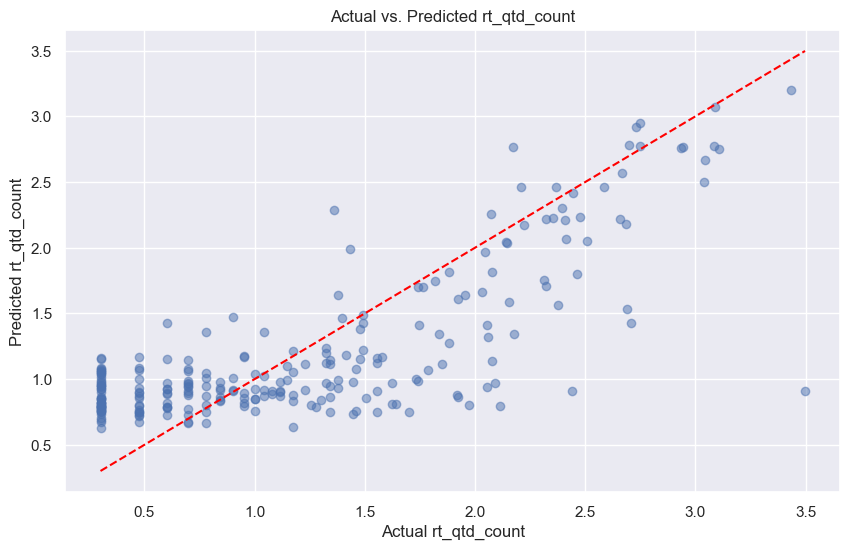

CPU times: user 2.66 s, sys: 1.81 s, total: 4.47 s
Wall time: 5.08 s


In [328]:
%%time
# Correct Model for Predicting Countries with Modifications to RandomForest

# Load the dataset
data = filtered_tweets

# Remove rows with missing values in the 'text' column
data = data.dropna(subset=['text'])

# Function to perform sentiment analysis
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return 'positive' if sentiment >= 0 else 'negative'

# Apply sentiment analysis to each sentence and create a new column
data['sentiment'] = data['text'].apply(get_sentiment)

# Extract the relevant features and sentiment column
columns_to_extract = ['country', 'text', 'rt_qtd_count', 'sentiment', 'friends_count', 'followers_count']
subset_data = data[columns_to_extract]

# Handle missing values in 'state', 'friends_count', and 'followers_count' columns
subset_data['country'].fillna('Unknown', inplace=True)
subset_data['rt_qtd_count'].fillna(0, inplace=True)
subset_data['friends_count'].fillna(0, inplace=True)
subset_data['followers_count'].fillna(0, inplace=True)

# Remove rows where 'rt_qtd_count' is zero
subset_data = subset_data[subset_data['rt_qtd_count'] > 0]

# Apply log base 10 transformation with a small constant to avoid zero values
subset_data['rt_qtd_count_log10'] = np.log10(subset_data['rt_qtd_count'] + 1)

# Prepare the data
X = subset_data[['country', 'text', 'sentiment', 'followers_count', 'friends_count']]
y = subset_data['rt_qtd_count_log10']

# Create dummy variables for the 'country' column
X = pd.get_dummies(X, columns=['country'], drop_first=True)

# Convert sentiment to numerical representation
sentiment_map = {'positive': 1, 'negative': 0}
X['sentiment'] = X['sentiment'].map(sentiment_map)

# Create a Count vectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'text' column
X_text = vectorizer.fit_transform(X['text'])

# Get the feature names (column names after vectorization)
feature_names = vectorizer.get_feature_names_out()

# Combine the transformed 'text' and other features
X_text_df = pd.DataFrame(X_text.toarray(), columns=feature_names, index=X.index)
X_other_features = X.drop('text', axis=1).reset_index(drop=True)
X_features = pd.concat([X_text_df.reset_index(drop=True), X_other_features.reset_index(drop=True)], axis=1)

# Convert all column names to strings
X_features.columns = X_features.columns.astype(str)

# Ensure there are no NaN values in the feature sets
X_features.fillna(0, inplace=True)

# Scale numerical features
scaler = StandardScaler()
X_features_scaled_countries = scaler.fit_transform(X_features)

# Convert the scaled array back to a DataFrame with the original column names
X_features_scaled_countries_df = pd.DataFrame(X_features_scaled_countries, columns=X_features.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled_countries, y, test_size=0.2, random_state=42)

# Create and train the Random Forest regressor model

#Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

model = RandomForestRegressor(
    n_estimators=300,      # Increased number of trees
    max_depth=None,          # Limiting depth of each tree
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,    # Minimum number of samples required to be at a leaf node
    max_features='sqrt',   # Number of features to consider when looking for the best split
    random_state=42,       # Ensures a certain level of reproducibility
    bootstrap=True         # Using bootstrapping
)


#'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None

#max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150



#model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = np.corrcoef(y_test, y_pred)[0, 1]
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R^2:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Line of perfect fit
plt.title('Actual vs. Predicted rt_qtd_count')
plt.xlabel('Actual rt_qtd_count')
plt.ylabel('Predicted rt_qtd_count')
plt.show()


In [329]:
%%time


param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,  # Increased number of folds
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)



Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

KeyboardInterrupt: 

In [330]:
# Ensure that the DataFrame and response are aligned
X_features_scaled_countries_df.reset_index(drop=True, inplace=True)
subset_data.reset_index(drop=True, inplace=True)

# Check and ensure all columns are of numeric type
X_features_scaled_countries_df = X_features_scaled_countries_df.apply(pd.to_numeric, errors='ignore')

# Add a constant to the feature DataFrame
XX = sm.add_constant(X_features_scaled_countries_df)

# Confirm alignment
assert len(XX) == len(subset_data['rt_qtd_count_log10']), "The lengths of XX and y must match"

# Response variable
y = subset_data['rt_qtd_count_log10']

def verify_data_alignment(features, response):
    if not features.index.equals(response.index):
        raise ValueError("Indices do not match.")
    if features.isnull().any().any() or response.isnull().any():
        raise ValueError("NaN values found in data.")
    if features.shape[0] != response.shape[0]:
        raise ValueError("Feature and response variable lengths do not match.")
    print("Data verification passed. Proceeding with model fitting.")

verify_data_alignment(XX, subset_data['rt_qtd_count_log10'])


Data verification passed. Proceeding with model fitting.


In [331]:
XX = X_features_scaled_countries

XX = sm.add_constant(XX)
y = subset_data['rt_qtd_count_log10']
model = sm.OLS(y, XX)


In [332]:
results = model.fit()
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     rt_qtd_count_log10   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     1.297
Date:                Sat, 01 Jun 2024   Prob (F-statistic):            0.00251
Time:                        21:45:34   Log-Likelihood:                -523.57
No. Observations:                1233   AIC:                             2839.
Df Residuals:                     337   BIC:                             7424.
Df Model:                         895                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2145      0.029     41.891      0.000       1.158       1.272
x1          8.152e+11   1.69e+12      0.483      0.629    -2.5e+12    4.13e+12
x2          2.949e+10   3.97e+11      0.074      0.941   -7.51e+11     8.1e+11
x3         -8.345e+10   2.08e+11     -0.401      0.688   -4.92e+11    3.26e+11
x4          4.576e+11   7.76e+11      0.590      0.556   -1.07e+12    1.98e+12
x5         -4.829e+11   9.09e+11     -0.531      0.596   -2.27e+12    1.31e+12
x6         -6.123e+10   2.36e+11     -0.260      0.795   -5.25e+11    4.02e+11
x7         -7.466e+10   4.21e+11     -0.177      0.859   -9.03e+11    7.54e+11
x8          1.842e+11   5.81e+11      0.317      0.751   -9.58e+11    1.33e+12
x9         -2.869e+08    3.6e+11     -0.001      0.999   -7.09e+11    7.08e+11
x10         1.494e+11   1.95e+11      0.766      0.444   -2.34e+11    5.33e+11
x11        -1.786e+11   3.11e+11     -0.574      0.566    -7.9e+11    4.33e+11
x12        -1.379e+11   5.19e+11     -0.266      0.791   -1.16e+12    8.82e+11
x13        -8.338e+09   1.78e+11     -0.047      0.963   -3.59e+11    3.42e+11
x14        -1.881e+11   6.54e+11     -0.288      0.774   -1.47e+12     1.1e+12
x15        -1.965e+11   3.45e+11     -0.570      0.569   -8.75e+11    4.82e+11
x16         6.726e+10   1.44e+11      0.466      0.642   -2.17e+11    3.51e+11
x17        -2.144e+11   4.03e+11     -0.531      0.596   -1.01e+12    5.79e+11
x18        -9.137e+09   2.28e+11     -0.040      0.968   -4.58e+11     4.4e+11
x19         1.239e+11   5.47e+11      0.226      0.821   -9.52e+11     1.2e+12
x20        -9.315e+11   1.61e+12     -0.577      0.564   -4.11e+12    2.25e+12
x21         4.689e+11   1.04e+12      0.450      0.653   -1.58e+12    2.52e+12
x22         2.818e+11   3.37e+11      0.836      0.404   -3.81e+11    9.45e+11
x23         1.504e+11   2.78e+11      0.540      0.589   -3.97e+11    6.98e+11
x24         2.669e+09   2.34e+11      0.011      0.991   -4.57e+11    4.63e+11
x25        -1.333e+10   2.59e+11     -0.051      0.959   -5.23e+11    4.96e+11
x26        -9.274e+10   3.62e+11     -0.256      0.798   -8.05e+11     6.2e+11
x27         1.097e+11   2.79e+11      0.393      0.695    -4.4e+11    6.59e+11
x28        -1.649e+11   2.19e+11     -0.754      0.452   -5.95e+11    2.65e+11
x29         1.272e+11   1.29e+11      0.989      0.323   -1.26e+11     3.8e+11
x30        -1.355e+11   3.01e+11     -0.451      0.653   -7.27e+11    4.56e+11
x31         9.865e+10   1.53e+11      0.643      0.520   -2.03e+11       4e+11
x32         3.738e+10    3.3e+11      0.113      0.910   -6.12e+11    6.87e+11
x33        -3.471e+11   6.22e+11     -0.558      0.577   -1.57e+12    8.76e+11
x34         1.291e+11   4.48e+11      0.288      0.773   -7.52e+11    1.01e+12
x35         4.561e+11   5.01e+11      0.910      0.364    -5.3e+11    1.44e+12
x3

In [333]:
# Step 1: Extract the coefficients table from the model summary
table_data = results.summary().tables[1]

# Step 2: Convert the SimpleTable to a DataFrame
# Extract header and data rows from the summary table
header = table_data.data[0]
data = table_data.data[1:]

# Create the DataFrame
coeff_df = pd.DataFrame(data, columns=header)

# Step 3: Clean up the column names to remove extra spaces
coeff_df.columns = [col.strip() for col in coeff_df.columns]
coeff_df[''] = coeff_df[''].str.strip()  # Clean feature names

# Adding the feature names as a separate column for clarity
# Since the first feature is the constant added, we handle it separately
feature_names = ['const'] + list(X_features_scaled_countries_df.columns)
coeff_df['name'] = feature_names

# Optional: Reorder the DataFrame to have the 'name' column first
columns = ['name'] + [col for col in coeff_df.columns if col != 'name']
coeff_df = coeff_df[columns]

coeff_df

,name,,coef,std err,t,P>|t|,[0.025,0.975]
0,const,const,1.2145,0.029,41.891,0.000,1.158,1.272
1,000,x1,8.152e+11,1.69e+12,0.483,0.629,-2.5e+12,4.13e+12
2,01,x2,2.949e+10,3.97e+11,0.074,0.941,-7.51e+11,8.1e+11
3,04,x3,-8.345e+10,2.08e+11,-0.401,0.688,-4.92e+11,3.26e+11
4,0cch4j8h4t,x4,4.576e+11,7.76e+11,0.590,0.556,-1.07e+12,1.98e+12
...,...,...,...,...,...,...,...,...
4149,country_United Kingdom,x4149,-7.448e+10,1.2e+11,-0.621,0.535,-3.11e+11,1.62e+11
4150,country_United States,x4150,-9.95e+10,1.6e+11,-0.621,0.535,-4.15e+11,2.16e+11
4151,country_Unknown,x4151,-1.284e+11,2.07e+11,-0.621,0.535,-5.35e+11,2.79e+11
4152,country_Venezuela,x4152,-1.766e+10,5.74e+10,-0.308,0.759,-1.31e+11,9.52e+10


In [334]:
#Print the 10 largest values

# Ensure 'coef' is numeric for sorting purposes
coeff_df['coef'] = pd.to_numeric(coeff_df['coef'], errors='coerce')

largest_coefs = coeff_df.nlargest(10, 'coef')
largest_coefs

,name,,coef,std err,t,P>|t|,[0.025,0.975]
109,aayeff1,x109,2.952000e+12,2.39e+12,1.233,0.218,-1.76e+12,7.66e+12
1059,didn,x1059,2.825000e+12,1.57e+12,1.795,0.074,-2.7e+11,5.92e+12
171,admitted,x171,1.290000e+12,8.64e+11,1.493,0.136,-4.1e+11,2.99e+12
299,another,x299,1.223000e+12,1.05e+12,1.169,0.243,-8.34e+11,3.28e+12
1096,dismissing,x1096,1.177000e+12,2.36e+12,0.499,0.618,-3.46e+12,5.81e+12
1078,disagreed,x1078,1.039000e+12,9.42e+11,1.103,0.271,-8.14e+11,2.89e+12
1134,donate,x1134,9.845000e+11,2.21e+12,0.446,0.656,-3.36e+12,5.33e+12
799,comedian,x799,9.392000e+11,1.4e+12,0.672,0.502,-1.81e+12,3.69e+12
3328,silenced,x3328,8.380000e+11,5.17e+11,1.621,0.106,-1.79e+11,1.85e+12
773,closure,x773,8.158000e+11,2.36e+12,0.346,0.730,-3.83e+12,5.46e+12


In [335]:
#Print the 10 smallest values

# Ensure 'coef' is numeric for sorting purposes
coeff_df['coef'] = pd.to_numeric(coeff_df['coef'], errors='coerce')

smallest_coefs = coeff_df.nsmallest(10, 'coef')
smallest_coefs

,name,,coef,std err,t,P>|t|,[0.025,0.975]
958,dare,x958,-1.793000e+12,3.11e+12,-0.577,0.564,-7.9e+12,4.32e+12
322,app,x322,-1.584000e+12,1.48e+12,-1.068,0.286,-4.5e+12,1.33e+12
781,cold,x781,-1.526000e+12,8.87e+11,-1.721,0.086,-3.27e+12,2.19e+11
813,companies,x813,-1.445000e+12,2.75e+12,-0.525,0.600,-6.86e+12,3.97e+12
1095,dismal,x1095,-1.260000e+12,2.12e+12,-0.595,0.552,-5.43e+12,2.91e+12
865,contribute,x865,-1.254000e+12,2.18e+12,-0.575,0.565,-5.54e+12,3.03e+12
1077,disadvantaged,x1077,-1.229000e+12,7e+11,-1.756,0.080,-2.61e+12,1.48e+11
404,authoritarian,x404,-1.216000e+12,7.09e+11,-1.715,0.087,-2.61e+12,1.79e+11
775,clutchers,x775,-1.213000e+12,6.96e+11,-1.742,0.082,-2.58e+12,1.57e+11
572,brexitbrit,x572,-1.187000e+12,1.3e+12,-0.910,0.364,-3.75e+12,1.38e+12


In [337]:
# Assuming coeff_df is defined and includes 'name' and 'coef' columns
new_dataset = coeff_df[['name', 'coef']]

# Filter rows for each category without taking the absolute value of coefficients

# For sentiment data
sentiment_data = new_dataset[new_dataset['name'].str.contains("sentiment")].copy()
sentiment_data = pd.DataFrame(sentiment_data)

# For followers count data
followers_count_data = new_dataset[new_dataset['name'].str.contains("followers_count")].copy()
followers_count_data = pd.DataFrame(followers_count_data)

# For friends count data
friends_count_data = new_dataset[new_dataset['name'].str.contains("friends_count")].copy()
friends_count_data = pd.DataFrame(friends_count_data)

# Example of how to print or utilize one of the modified datasets

sentiment_data


,name,coef
4114,sentiment,-2.969000e+10


In [338]:
followers_count_data

,name,coef
4115,followers_count,-0.052


In [339]:
friends_count_data

,name,coef
4116,friends_count,-0.1696


In [340]:
# Extract country data
country_data = new_dataset[new_dataset['name'].str.contains("country_")]

# Compute the weighted average, using the original coefficients for weighting
if not country_data.empty:
    # Use the original coefficients as weights, including their signs
    weights = country_data['coef']
    # Ensure no division by zero occurs if all weights are zero
    if np.any(weights != 0):
        country_weighted_average = np.average(country_data['coef'], weights=weights)
    else:
        country_weighted_average = None  # Handle case where all weights might be zero
else:
    country_weighted_average = None

print("Country Weighted Average:", country_weighted_average)

Country Weighted Average: -495743023447.4999


In [292]:
# Assuming new_dataset, sentiment_data, followers_count_data, and friends_count_data are already defined

# Exclude the rows that have been categorized and those related to "country_" to focus on text data
text_data = new_dataset[~new_dataset['name'].isin(sentiment_data['name']) & 
                        ~new_dataset['name'].isin(followers_count_data['name']) &
                        ~new_dataset['name'].isin(friends_count_data['name']) &
                        ~new_dataset['name'].str.contains("country_")]

# Compute the weighted average for text data, using the absolute values of coefficients both as values and weights
if not text_data.empty:
    # Calculate the absolute values of the coefficients to use as both weights and values
    abs_coefs = text_data['coef'].abs()
    # Compute the weighted average using these absolute values
    text_weighted_average = np.average(abs_coefs, weights=abs_coefs)
else:
    text_weighted_average = None

print("Text Weighted Average:", text_weighted_average)

Text Weighted Average: 357222744032.4939
